In [2]:
# Modulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Práctica Final, Equipo 3.
#### Nelson Alejandro Gil Vargas
#### Miguel Castañeda

### Base de datos: Red Wine Quality
Fuentes: [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

La base de datos está relacionada con las variantes rojo y blanco del vino portugués [Vinho Verde](https://www.vinhoverde.pt/en/about-vinho-verde). Esta base de datos únicamente contiene variables de tipo fisicoquímico, y su salida es una única variable sensorial que representa la calidad, medida del $(1, 10)$.

De acuerdo con el fabricante, este vino únicamente se produce en la región Vinho Verde al noreste de Portugal, ya que se produce únicamente con las especies endémicas de uva que existen en la zona, preservando su sabor y aroma como uno de los más únicos en el mundo.

**Objetivo:**<br>
> Identificar las variables de mayor capacidad explicativa para el modelo de calidad de vino
> Hacer un modelo que permita comprender el impacto de cada variable en la calidad del vino

**Cargando los datos:**<br>

In [3]:
# Importando datos 
vino = pd.read_csv("winequality-red.csv")
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Descripción de la base de datos:
Tamaño de la base: $(1599, 12)$

Variables de la base:
* Fixed Acidity $\in (4.6, 15.9)$, `float`: Conjunto de los ácidos naturales procedentes de la uva.
* Volatile Acidity $\in (0.12, 1.58)$, `float`: Conjunto de los ácidos formados durante la fermentación o como consecuencia de alteraciones microbianas.
* Citric Acidity $\in (0, 1)$, `float`: Referente a los suplementos ácidos derivados de la fermentación de soluciones de sacarosa.
* Residual Sugar $\in (0.9, 15.5)$, `float`: Azúcares naturales residuales propios de la uva.
* Chlorides $\in (0.12, 0.611)$, `float`: Típicamente cloruro de sodio.
* Free Sulfure Dioxide $\in (1, 72)$, `int`
* Total Sulfure Dioxide $\in (6, 289)$, `int`
* Density $\in (0.99007, 1.00369)$, `float`: Densidad del vino en $[g/cm^3]$.
* pH $\in (2.74, 4.01)$, `float`: pH del vino, se mantiene dentro del rango de una sustancia ácida.
* Sulphates $\in (0.33, 2)$, `float`: Típicamente debido a pesticidas usados para el cultivo de la vid.
* Alcohol $\in (8.4, 14.9)$, `float`: Porcentaje de alcohol.
* Quality $\in (3, 8)$, `int`: Medida de calidad del vino. 



# Análisis Exploratorio de Datos

El análisis exploratorio permite resumir las características principales de conjuntos de datos. Permite extraer información de los datos antes de modelarlos. Se apoya de la estadística descriptiva y de métodos de visualización para resumir información de grandes conjuntos de datos. 

Como se observó en la descripción de las variables, todas son de tipo cuantitativo, por lo que nuestro análisis exploratorio consistirá en calcular los estadísticos de resumen de cada variable, graficar sus histogramas, hacer un breve análisis de ellos, calcular las correlaciones e interpretarlas. 

¿Existen valores nulos en el dataframe?

In [5]:
vino.isnull().values.any()

False

**Estadísticos de resumen**

In [6]:
vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


La función describe() nos facilita la tarea de calcular los estadísticos de resumen de cada variable y lo hace para cada columna del dataframe. Existen 1599 registros de cada variable. Describe() nos devuelve:
* Count = número de elementos
* Mean = media aritmética
* Std = desviación estándar
* Min = valor mínimo
* 25% = primer cuartil
* 50% = mediana
* 75% = tercer cuartil 
* Max = valor máximo
Por sí sólos, estos valores no nos dicen mucho. "Una imagen dice más que mil palabras", por lo que obtendremos histogramas y *boxplots* de cada variable, para indentificar cómo se concentran los datos, presencia de valores atípicos y simetría en las distribuciones. 

**Acidez fija**

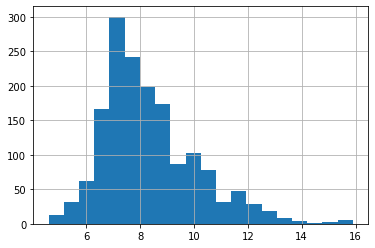

In [7]:
vino['fixed acidity'].hist(bins=20)

Los valores de acidez fija tienen un sesgo positivo, se centran en la media de 8.3.

**Acidez volatil**

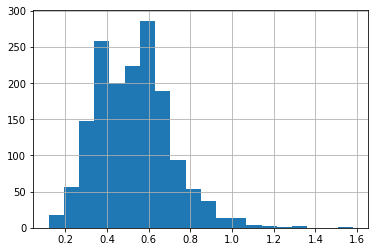

In [8]:
vino['volatile acidity'].hist(bins=20)

Los valores de acidez volatil tienen sesgo positivo y se concentran alrededor de la media de 0.53.

**Ácido cítrico**

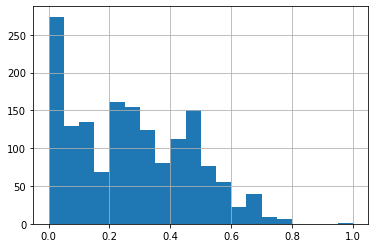

In [10]:
vino['citric acid'].hist(bins=20)

El ácido cítrico tiene sesgo positivo y la mayoría tiene un valor cercano a cero. 

**Azucar residual**

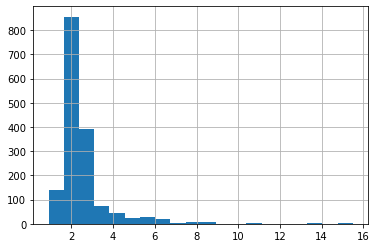

In [11]:
vino['residual sugar'].hist(bins=20)

El azucar residual tiene sesgo positivo, por lo que los vinos analizados tienden a tener poca azucar, con una media de 2.53.

**Cloruros**

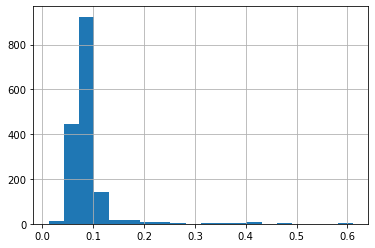

In [12]:
vino['chlorides'].hist(bins=20)

Los cloruros tienen sesgo positivo, y se concentran en la media de 0.08.

**Dióxido de azufre libre**

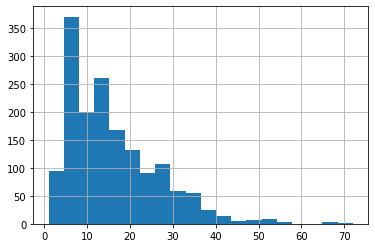

In [13]:
vino['free sulfur dioxide'].hist(bins=20)

El dióxido de azufre libre tiene sesgo positivo, se concentra principalemente entre valores de 0 y 20.

**Dióxido de azufre total**

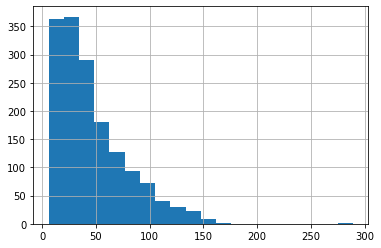

In [14]:
vino['total sulfur dioxide'].hist(bins=20)

La cantidad de dióxido de azufre total se concentra principalmente en los valores bajos, entre 0 y 50. 

**Densidad**

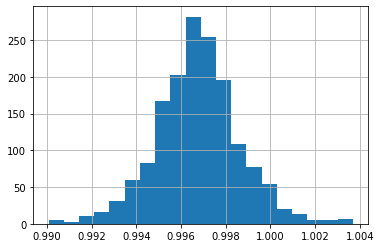

In [15]:
vino['density'].hist(bins=20)

La densidad de los vinos tiene una distribución simétrica, y se concentra alrededor de la media de 0.997.

**pH**

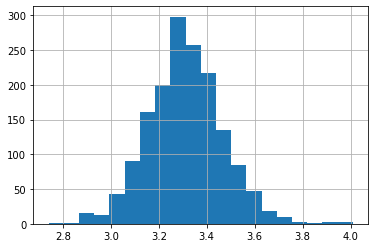

In [16]:
vino['pH'].hist(bins=20)

El pH de los vinos tiene una distribución bastante simétrica, que se concentra alrededor de su media de 3.31.

**Sulfatos**

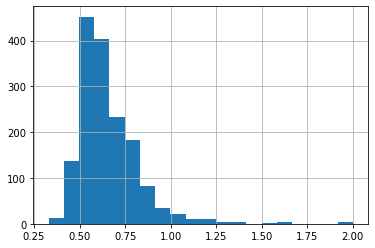

In [17]:
vino['sulphates'].hist(bins=20)

Los sulfatos tienen sesgo positivos y están concentrados principalmente entre el 0.5 y 0.75. 

**Alcohol**

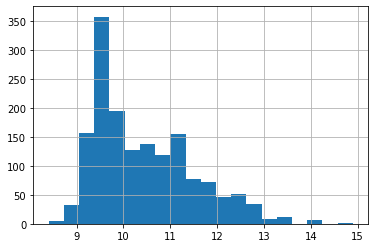

In [18]:
vino['alcohol'].hist(bins=20)

La concentración de alcohol tiene sesgo positivo, la mayoría de los vinos tienen entre 9.5 y 11.1 grados de alcohol (50% de los datos de acuerdo con el primer y tercer cuartil).

**Calidad**

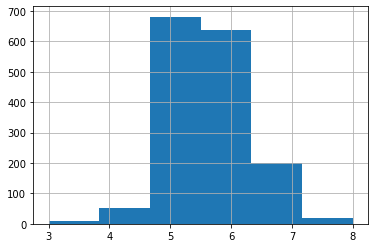

In [19]:
vino['quality'].hist(bins=6) 

Los valores de calidad tienen un ligero sesgo negativo, y son principalmente de 5 y 6 de calidad.

**Matriz de correlaciones**

Esta matriz nos permite observar la correlación existente entre las variables. Es importante recordar que una correlación cercana a cero no indica la inexistencia de correlación, existen caso en los que la correlación existente no es lineal, para estudiar esto a detalle es graficar un diagrama de dispersión entre esas variables.

También, debemos recordar que una correlación lineal de 1 no es equivalente a causalidad.

Con esta matriz, podemos darnos una idea de qué variables pueden ser más significativas en la predicción de valores de calidad. 

In [20]:
corr = vino.corr()

corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


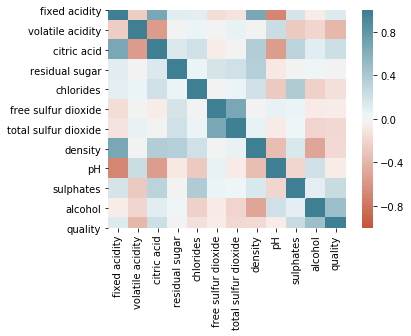

In [21]:
# Heatmap de correlaciones usando seaborn
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

El anterior *heatmap* permite identificar más eficientemente las variables que guardan mayor o menor correlación. 

Las variables que tienen mayor correlación con la calidad del vino son: alcohol y acidez volatil.  

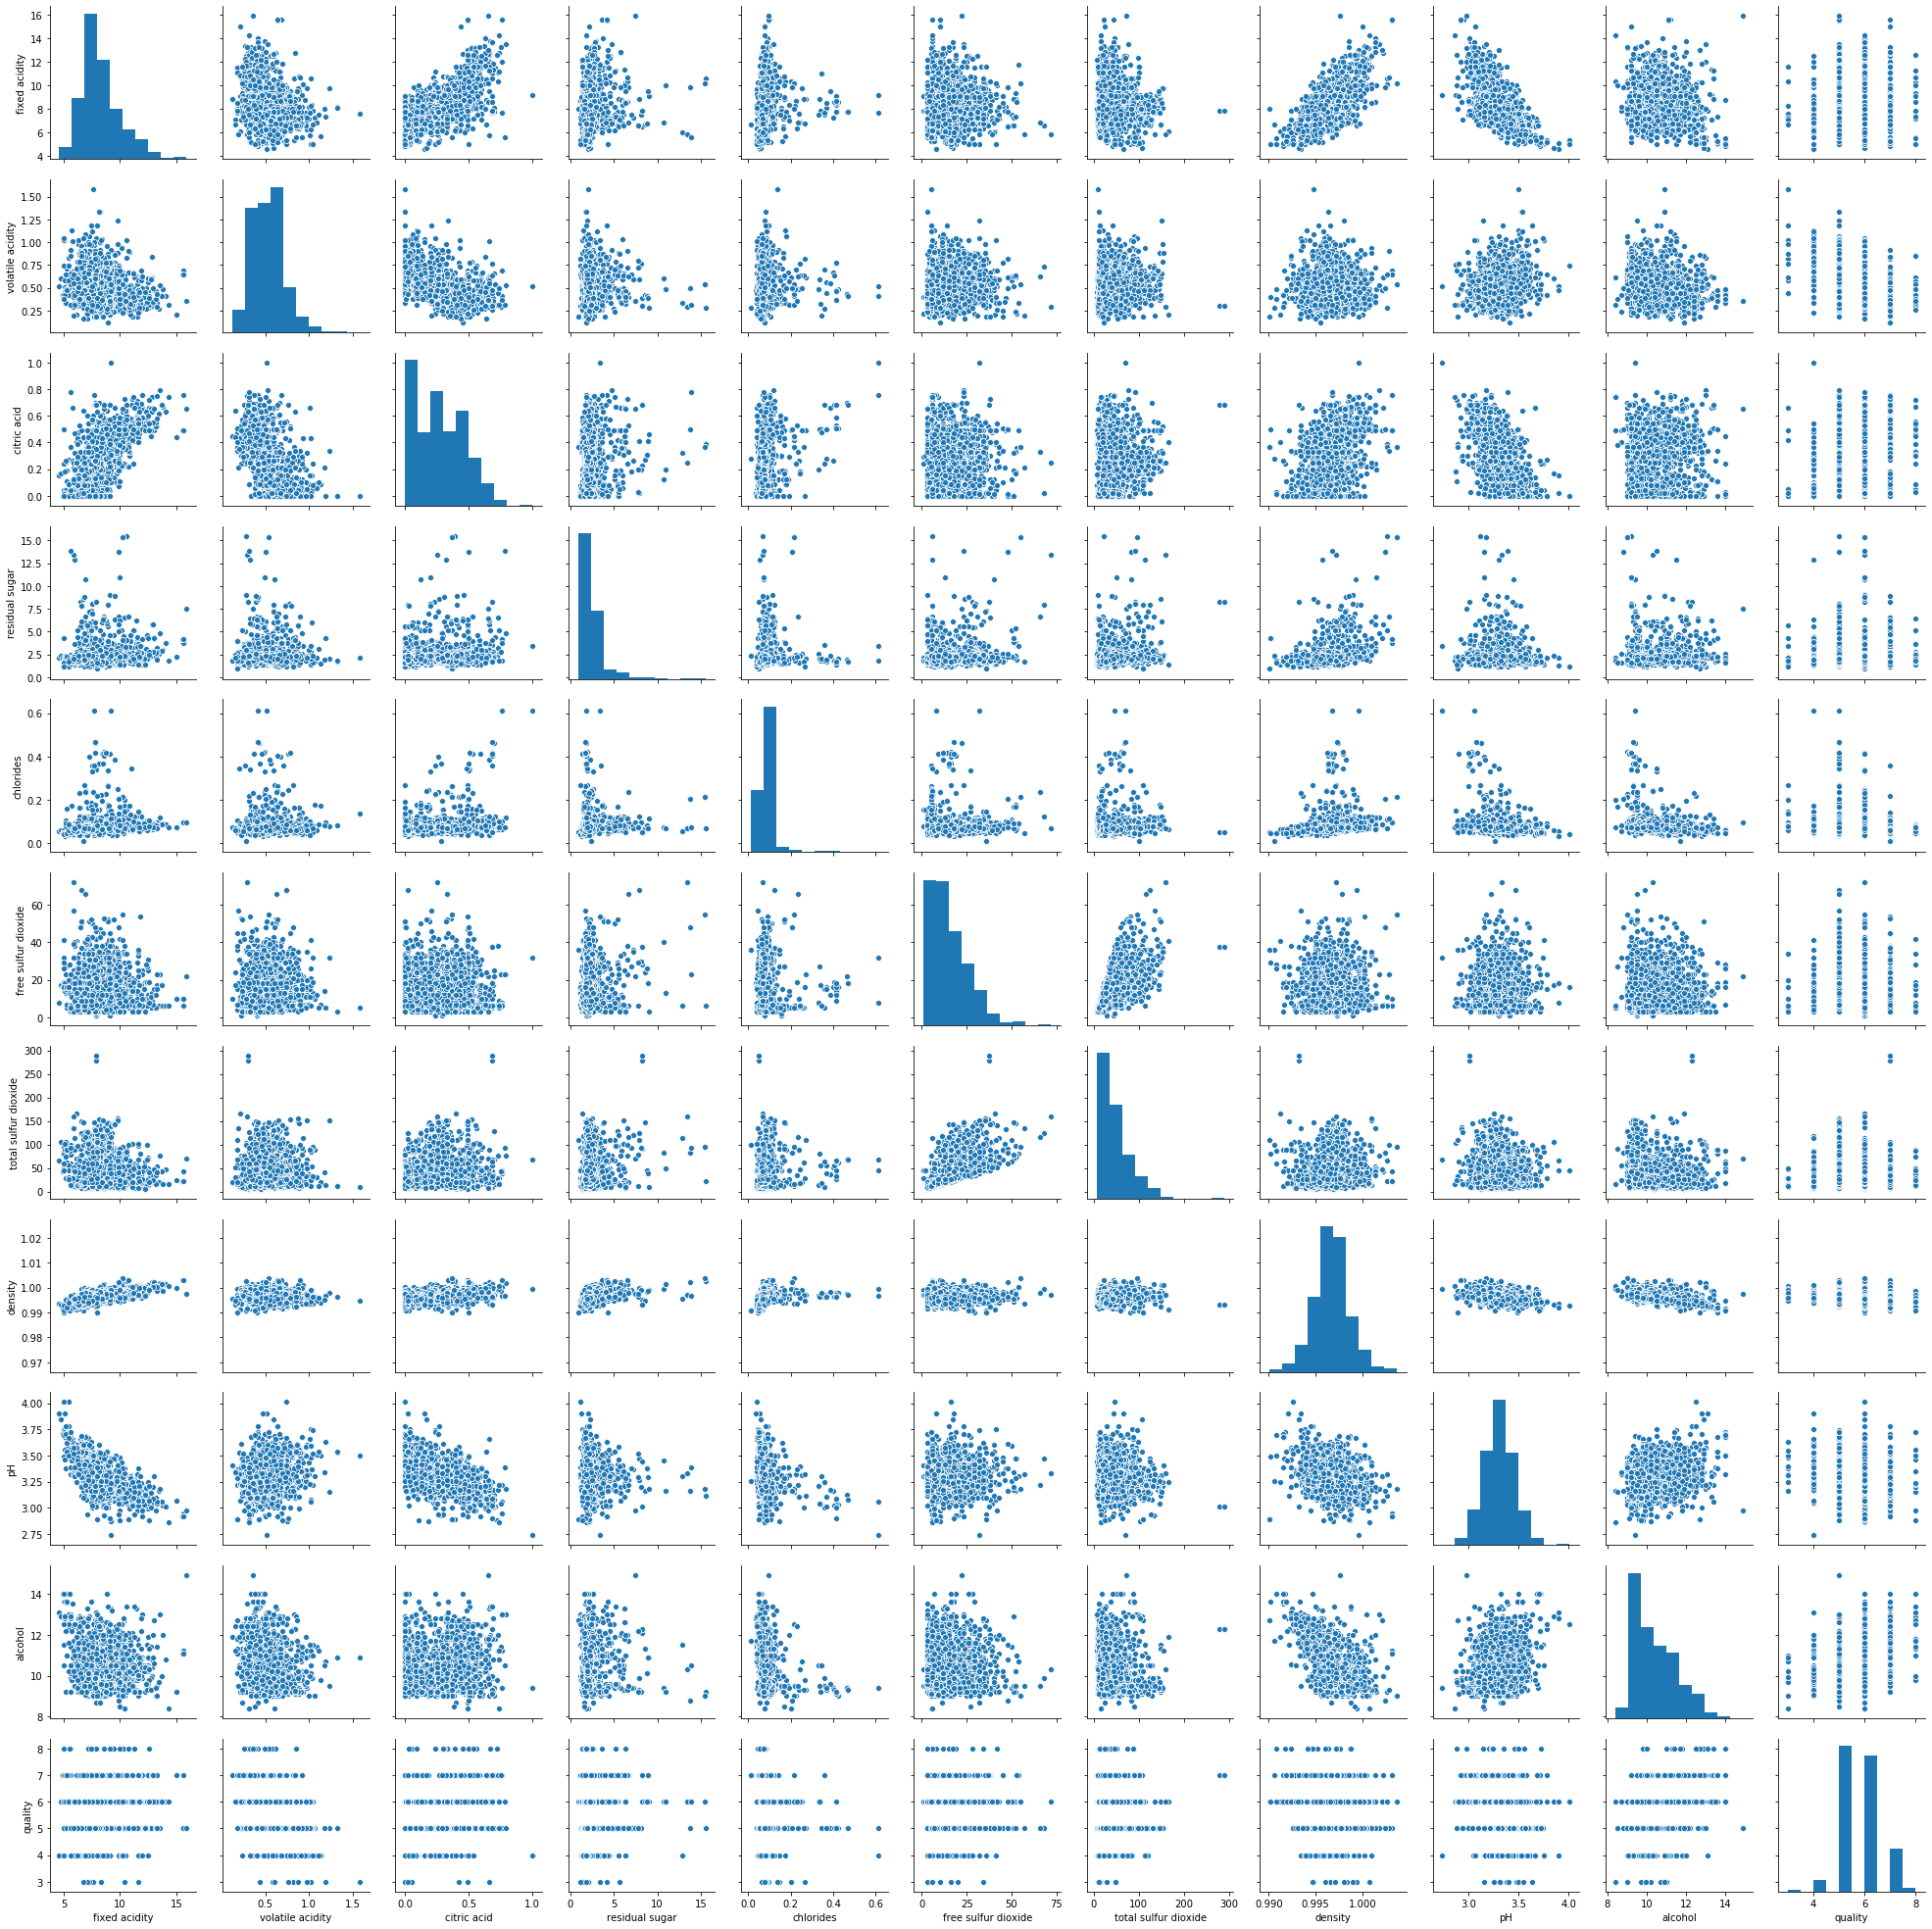

In [22]:
# Para observar la correlacion entre variables de forma visual se usa pairplot() de seaborn
sns.pairplot(vino, vars=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH', 'alcohol','quality'])  
plt.show()

Al ver los valores de correlación de calidad observamos que ninguno era muy cercano y esto tiene una interpretación. Esto ocurre ya que la calidad es una variable cualitativa discreta, mientras que las otras son continuas. Por ello, al ver los diagramas de dispersión de la columna *quality* se forman lineas verticales, por lo que no existe una recta que se ajuste a esos puntos. 

<b>Referencias adicionales:</b><br>
[Diccionario del vino](http://www.diccionariodelvino.com/index.php/acidez-fija/)<br>

[Ácidos en el vino](https://es.wikipedia.org/wiki/%C3%81cidos_en_el_vino#Otros_%C3%A1cidos)<br>

[Sulfatos en el vino](http://www.acenologia.com/cienciaytecnologia/azufre_seguridad_vinos_ecologicos_cienc173_1219.htm)

[What is Exploratory Data Analysis](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/)

[Scatterplot Matrix](https://vitalflux.com/what-when-how-scatterplot-matrix-pairplot-python/)

[Seaborn Heatmap](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)